# Lecture 03: Libraries and Plots
In this lecture we will go over how to install and use libraries from PyPI (the Python package index). We will use a few of these libraries to create some plots. 

To install libraries/packages, you will need to do so through the Terminal. Open Terminal. The following command should open Python

`python`

If that works, then libraries can be installed used the following command.

`python -m pip install numpy`

This command tells the Python library manager (pip) to install the latest version of the package named `numpy`. Packages are often updated. To update an installed library, you can use the following command

`python -m pip install numpy --upgrade`

After this process, you will be able to use that library. Depending on the package, the documentation of how it works may be available online, or you may have to use the `help()` command. Alternatively, many of these packages are available on GitHub. 

For this lecture, we will be using the following libraries; `numpy`, `matplotlib`, and `scipy`. 

## 3.0 Loading libraries
To load a library, we use the `import` statement. Below is how we will load the following libraries.

In [1]:
import scipy 
import numpy as np
import matplotlib.pyplot as plt

## 3.1 Other Data Types
Previously, we worked with lists, sets, dictionaries, and other data types. To introduce a complication, let's try to take the square root of items in a list 

In [2]:
x = [1, 4, 9, 16]
x**0.5

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'float'

As you can see, we get an error. We can get around this with a different approach to coding

In [3]:
[i**0.5 for i in x]

[1.0, 2.0, 3.0, 4.0]

This uses a for-loop with what is referred to as list comprehension. It is a simpler way to write a for-loop. The above code works but it is (comparatively) slow and hard to scale up to more complicated situations. This is where the NumPy library comes in handy.

Rather than using the list approach as shown above, we can use NumPy. Below is an example we will break down

In [4]:
np.asarray(x)**0.5

array([1., 2., 3., 4.])

The above code (specifically the `np.asarray()` function) converts our list, `x` into a `numpy.array`. This is a special object type within the NumPy library. The advantage is that is allows us to directly manipulate objects, similar to how we did math operations on integers and floats (it is also super fast). Additionally, NumPy as a ton of specialty functions. Rather than summarize any here, I recommend taking a look at some of the documentation (https://docs.scipy.org/doc/numpy/). Look up the factorial function and give it a try

One that I will introduce is `np.linspace()`. This function is similar to range, but it generates numbers between two points with a specified resolution. Below is code that generates 11 evenly spaced points between 0 and 1.

In [6]:
np.linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

We will build on NumPy's functionality in the next section. NumPy also allows for matrices and various manipulations. 

## 3.2 Graphics
We will briefly introduce the `matplotlib` library, with more details in the upcoming section. This is the library most commonly used to generate graphics. 

To start, let's look at a simple example

In [8]:
%matplotlib inline  
# this line does some jupyter magic. It does not work in Python

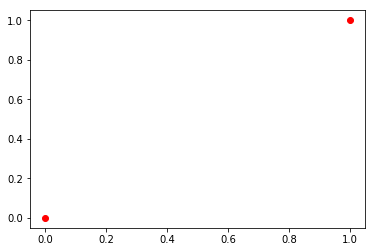

In [15]:
plt.plot([0, 1], # X-coordinates
         [0, 1], # Y-coordinates
         'o',    # Shape to plot. See https://matplotlib.org/3.1.1/api/markers_api.html
         color='r') # Color. See https://matplotlib.org/3.1.0/gallery/color/named_colors.html
plt.show()

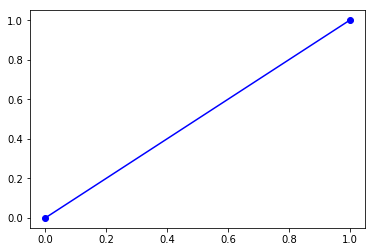

In [16]:
plt.plot([0, 1], # X-coordinates
         [0, 1], # Y-coordinates
         'o-',    # Dots with a line
         color='b') # Color. See https://matplotlib.org/3.1.0/gallery/color/named_colors.html
plt.show()

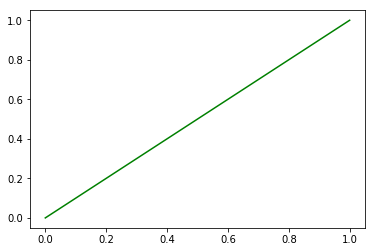

In [17]:
plt.plot([0, 1], # X-coordinates
         [0, 1], # Y-coordinates
         '-',    # Line only
         color='g') # Color. See https://matplotlib.org/3.1.0/gallery/color/named_colors.html
plt.show()

So these are some pretty basic examples. Let's creating something more exciting. As review from last week, we created a function  to solve for a quadratic value. I have copied the function below.

In [18]:
def quad_solver(a, b, c):
    """Solves a quadratic equation for where y=0
    """
    d = (b**2) - (4*a*c)
    if d < 0:
        raise ValueError("No Real solutions, so can't plot")
    else:
        sol1 = (-b-d**0.5)/(2*a)
        sol2 = (-b+d**0.5)/(2*a)
        return sol1, sol2

However, we can also solve a system like this graphically. We can do this by plugging in values for x and solving for y. I have written a simple function to do this below.

In [31]:
def quad_y_solver(a, b, c, x_values):
    """Solves for y for multiple values of x
    
    ax^2 + bx + c = y
    """
    x_ = np.asarray(x_values)
    y_values = a*x_**2 + b*x_ + c
    return y_values

Now that we have our values, let's display a quadratic equation

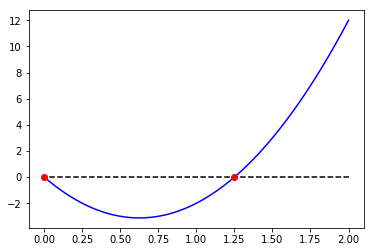

In [32]:
a, b, c = 8, -10, 0

# Plotting the curve
x_vals = np.linspace(0, 2, 100)
plt.hlines(0, 2, 0, linestyle='--', color='k')
plt.plot(x_vals, 
         quad_y_solver(a=a, b=b, c=c, x_values=x_vals), 
         '-', color='b')

# Plotting the solutions
solutions = quad_solver(a=a, b=b, c=c)
plt.plot(solutions, 
         quad_y_solver(a=a, b=b, c=c, x_values=solutions), 
         'o', color='r')
plt.show()


As you will see, we can "stack" as many plotting statements as we like. We can keep stacking statements until `plt.show()` is specified, which displays our plot

Below is an example function that solves our quadratic system and also creates a nice plot for use automatically.

In [58]:
def fancy_quadratic_solver(a, b, c, padding=1, color_line='b', color_solutions='r'):
    """Solves a quadratic system of the following form
    
    ax^2 + bx + c = y
    """
    # Solving for discriminant first
    d = (b**2) - (4*a*c)
    if d < 0:
        raise ValueError("No Real solutions, so can't plot")
    else:
        solutions = np.asarray([(-b - d**0.5)/(2*a), (-b + d**0.5)/(2*a)])
    
    # finding minimum and maximum of solutions
    min_sol = np.min(solutions)
    max_sol = np.max(solutions)

    # Creating x-values to plot between
    x_values = np.linspace(min_sol - padding, max_sol + padding, 1000)
    y_values = a*x_values**2 + b*x_values + c
    
    # Printing solutions
    print("Solutions:", solutions)
    
    # Plotting solutions and curve
    plt.hlines(0, min_sol-padding, max_sol+padding, linestyle='--', color='k')
    plt.plot(x_values, y_values, '-', color=color_line)
    plt.plot(solutions, a*solutions**2 + b*solutions + c, 'o', color=color_solutions)
    
    # some fancier plot formatting statments
    plt.xlim([min_sol-padding, max_sol+padding])
    plt.title("Solutions: "+np.str(solutions))
    plt.tight_layout()
    plt.show()

Solutions: [ 1.25 -0.  ]


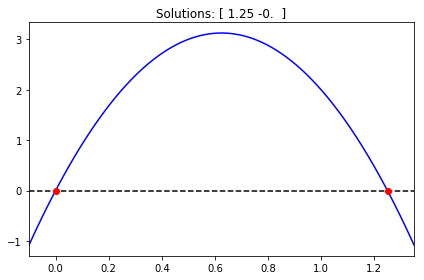

In [59]:
fancy_quadratic_solver(a=-8, b=10, c=0, padding=0.1)

Now we have a nice visual display of our results to complement the analytical solutions. To show some of the possibilities, see the below code for a nonlinear system. It displays the graphical stability analysis (you don't need to know what this is, I am only using it as a further example)

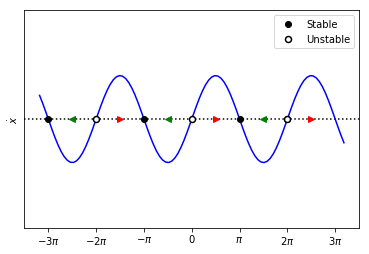

In [61]:
# Calculate points for line
x = np.linspace(-10, 10, 100)
y = np.sin(x)

# PLotting main blue line
plt.plot(x, y, color='blue', label=None)
# Plotting horizontal reference line
plt.hlines(0, -11, 11, linestyle=':', label=None)
# Plotting arrows and points
plt.plot([-1.5*np.pi, 0.5*np.pi, 2.5*np.pi], [0, 0, 0], linestyle='', marker='>', color='r', label=None)
plt.plot([-2.5*np.pi, -0.5*np.pi, 1.5*np.pi], [0, 0, 0], linestyle='', marker='<', color='g', label=None)
plt.plot([-3*np.pi, -1*np.pi, np.pi, 2*np.pi], [0, 0, 0, 0], linestyle='',
         marker='o', color='k', label='Stable')
plt.plot([-2*np.pi, 0, 2*np.pi], [0, 0, 0], linestyle='',
         marker='o', markerfacecolor='w', markeredgewidth=1.5, markeredgecolor='k', label='Unstable')
# Formatting the plot
plt.yticks([])
plt.ylim([-2.5, 2.5])
plt.ylabel(r'$\dot{x}$')
plt.xlim([-11, 11])
plt.xticks([-3*np.pi, -2*np.pi, -1*np.pi, 0, np.pi, 2*np.pi, 3*np.pi], 
           [r'$-3\pi$', r'$-2\pi$', r'$-\pi$', '0', r'$\pi$', r'$2\pi$', r'$3\pi$'])
plt.legend()
plt.show()

For practice, write some code the plot a some function for several values.

Below is another example of plotting. This time, we will test how "fair" our dice rolling program is

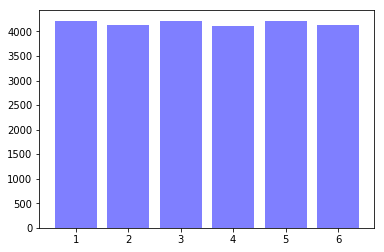

In [65]:
import random
sides = [1, 2, 3, 4, 5, 6]
dice_roll = []

for i in range(25000):
    d = random.choice(sides)
    dice_roll.append(d)

# Counting number of each "side" of the die
rolls = [dice_roll.count(1),
         dice_roll.count(2),
         dice_roll.count(3),
         dice_roll.count(4),
         dice_roll.count(5),
         dice_roll.count(6)]

# Creating a bar chart
plt.bar(sides, rolls, align='center', color='b', alpha=0.5)
plt.show()

So, it looks like our "die" is fair. 

One more example to close. We will look at a histogram for another random number generator

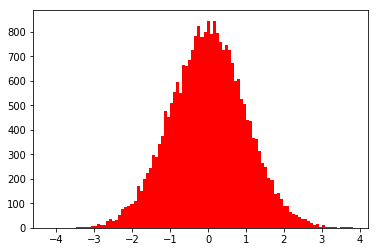

In [71]:
draws = []

for i in range(25000):
    n = np.random.normal()
    draws.append(n)

# Creating histogram
plt.hist(draws, color='red', bins=100)
plt.show()

This concludes the basics of plotting. There are lots of additional complexities that can be added. There is lots of great documentation on the matplotlib website and throughout the internet.

To conclude, let's go through the dice rolling example